# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [ ]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [4]:
str(df_public_data)

'data.frame':	212 obs. of  31 variables:
 $ year                                : num  2006 2006 2006 2006 2006 ...
 $ month_name                          : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                          : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                               : Time-Series  from 2006 to 2024: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation        : Time-Series  from 2006 to 2024: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation      : Time-Series  from 2006 to 2024: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ consumer_confidence_index           : Time-Series  from 2006 to 2024: 93.3 92.8 93 91.8 90.7 90.7 91.2 91.8 91.5 94.3 ...
 $ inflation_target                    : Time-Series  from 2006 to 2024: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound        : Time-Series  from 2006 to 2024: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


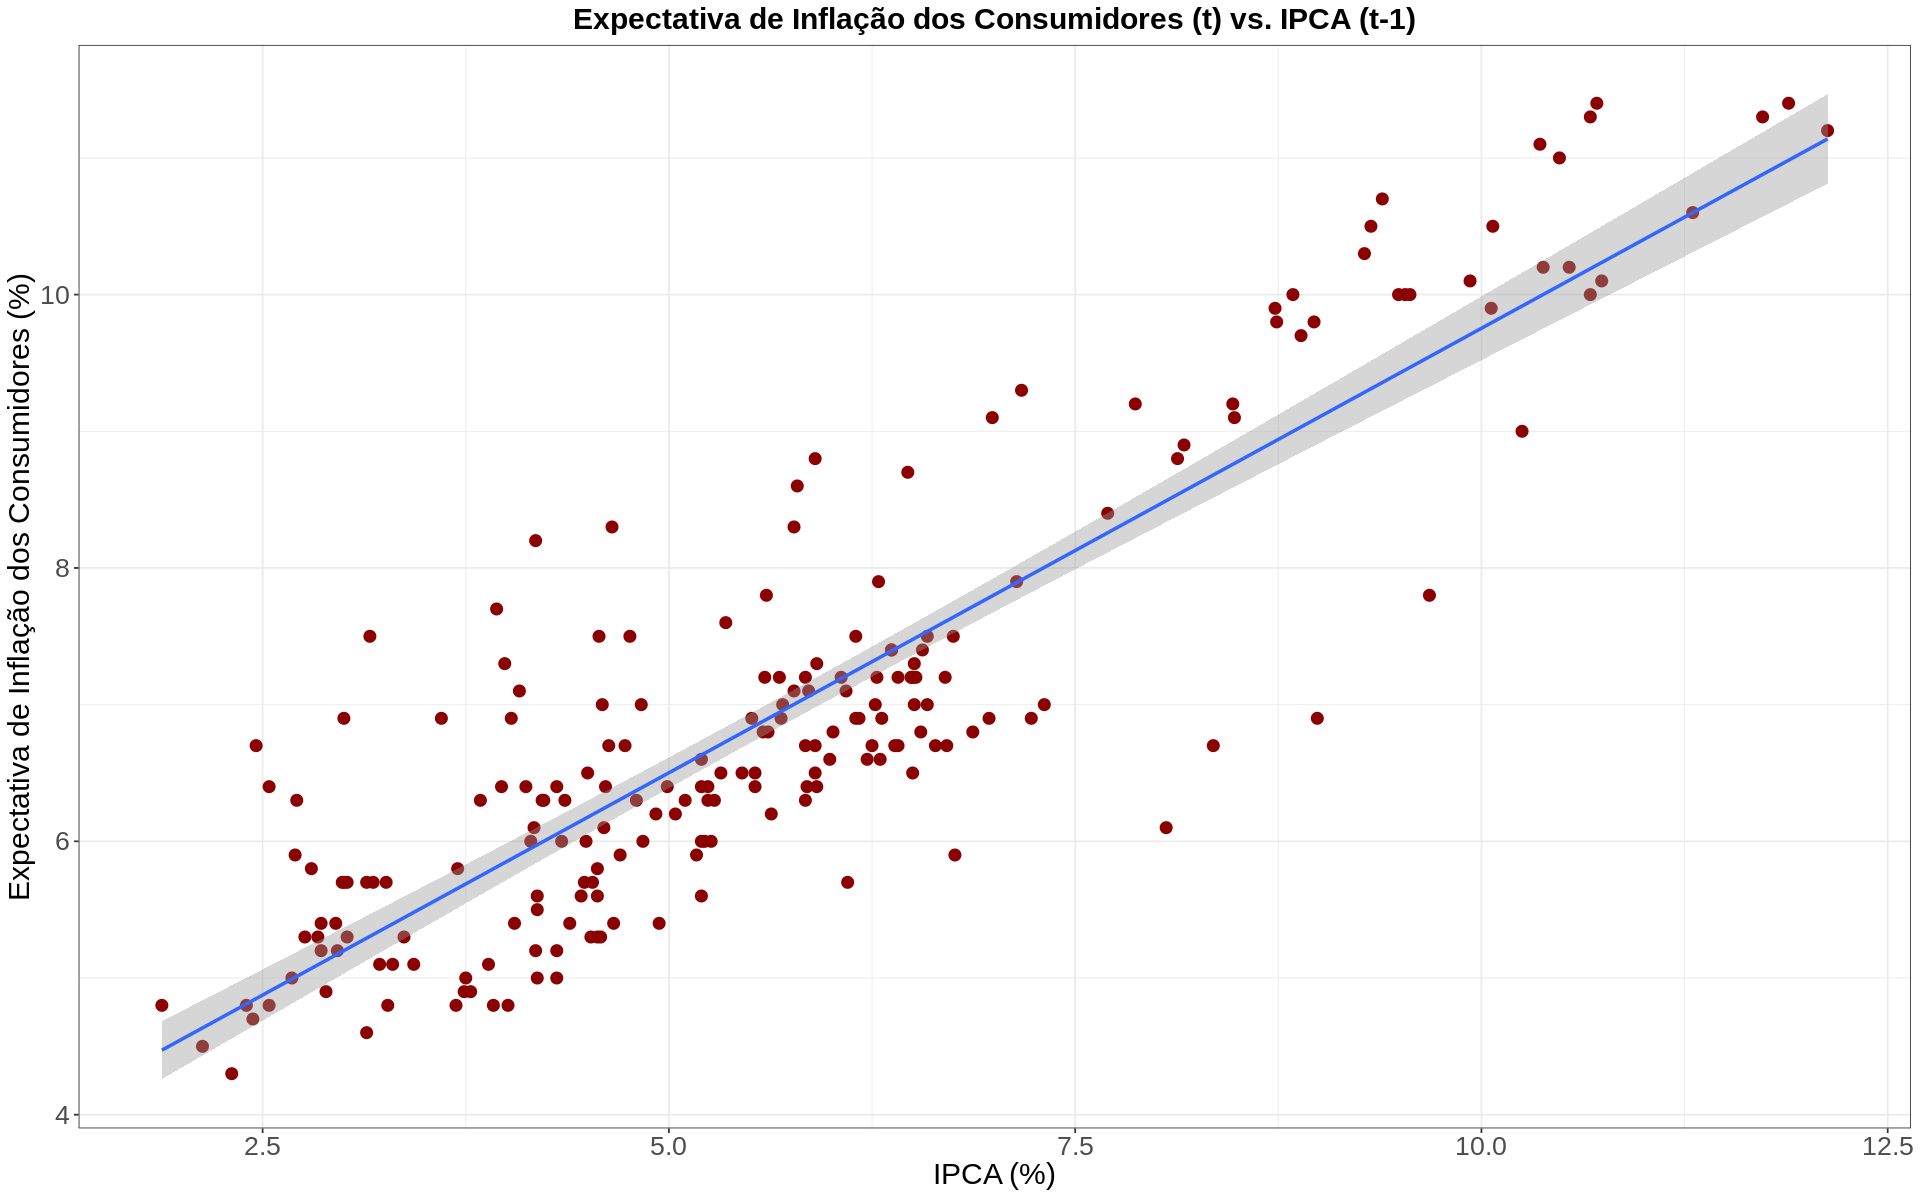

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = consumer_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação dos Consumidores (%)", title = "Expectativa de Inflação dos Consumidores (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [6]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3957 -0.3064  0.3806  1.3894  3.8827 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  1.14524    0.01602   71.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.426 on 211 degrees of freedom
Multiple R-squared:  0.9603,	Adjusted R-squared:  0.9602 
F-statistic:  5110 on 1 and 211 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 95% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação dos Consumidores (t) varia 1.145%

> #### **Expectativa de Inflação do Mercado**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


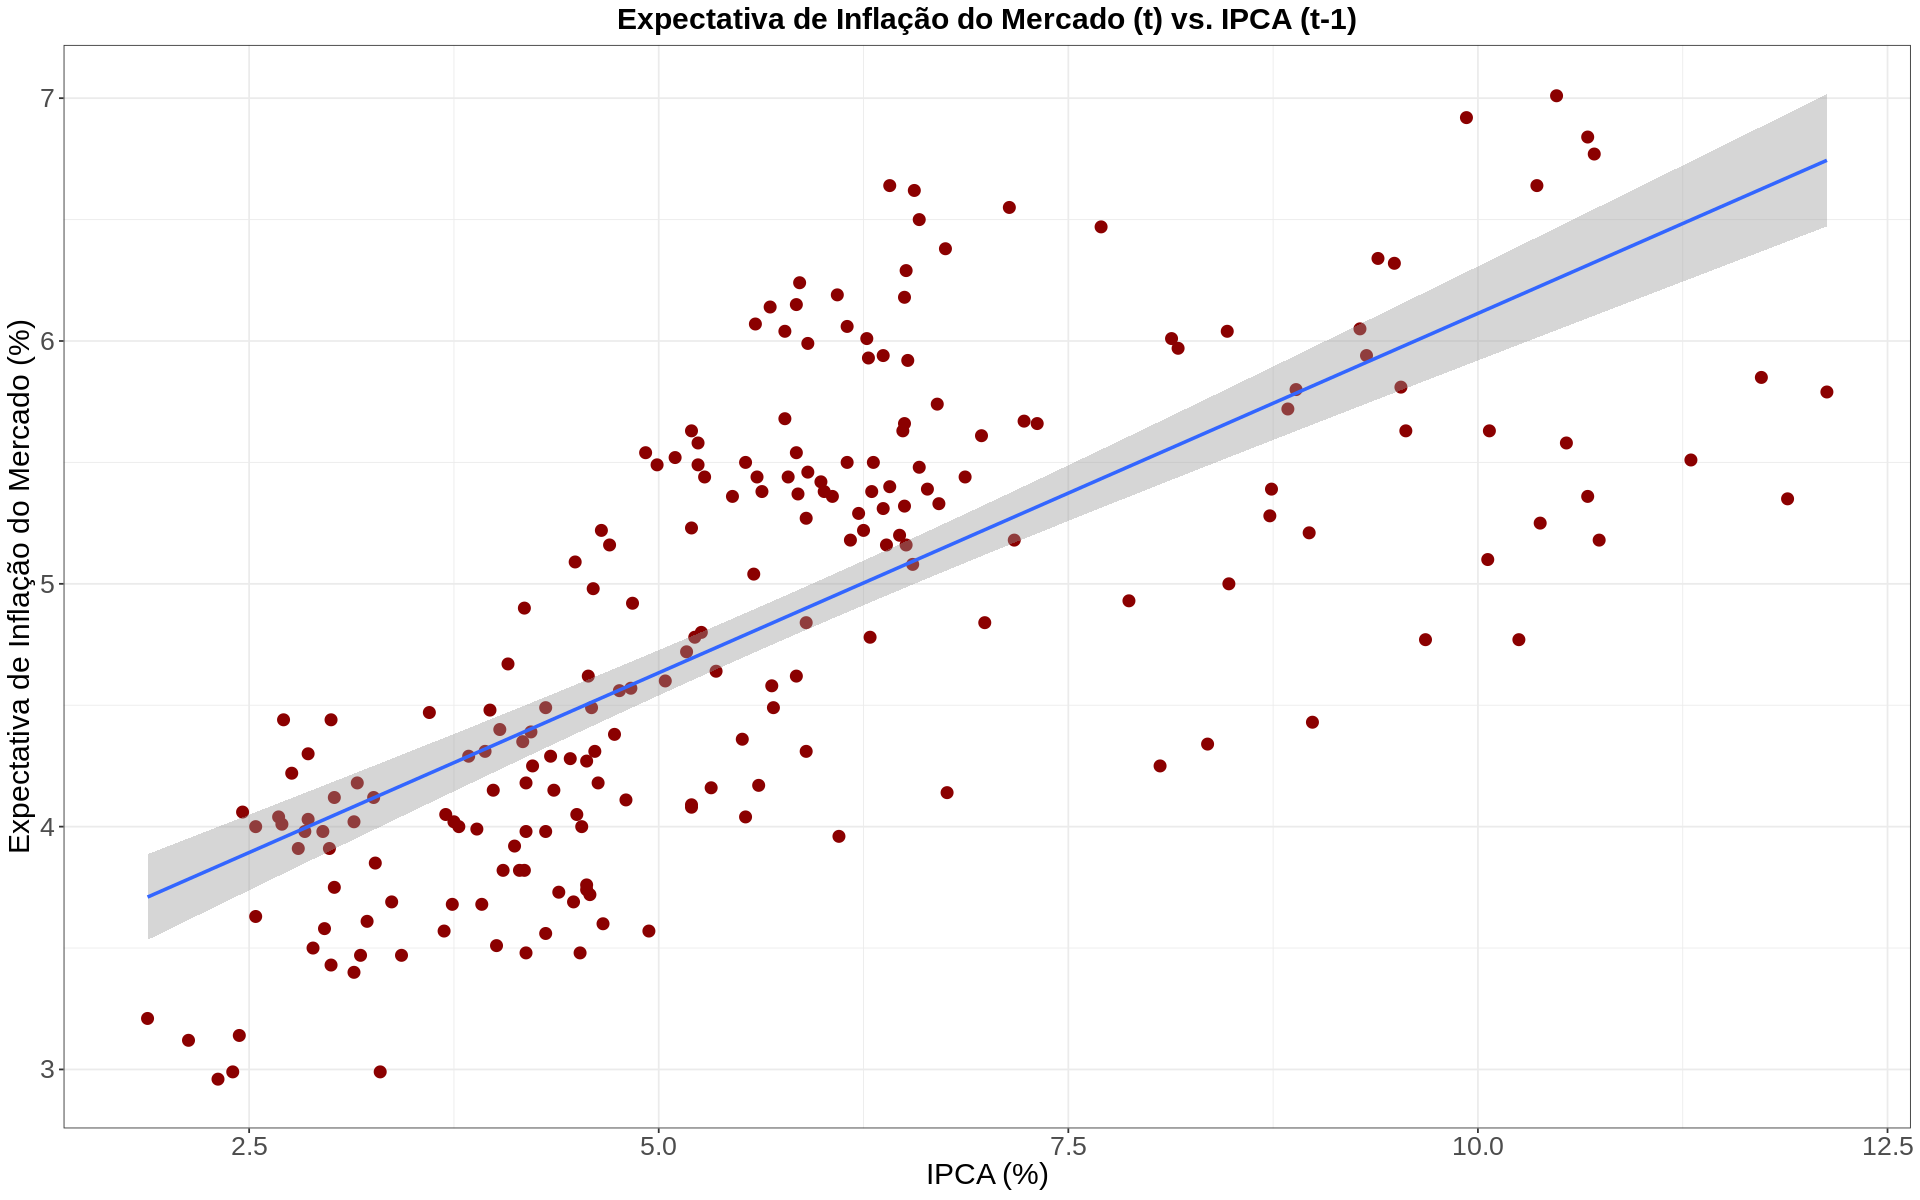

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "market_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = market_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação do Mercado (%)", title = "Expectativa de Inflação do Mercado (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [8]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8794  0.0635  0.7195  1.2474  2.3364 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag   0.7762     0.0149   52.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.327 on 211 degrees of freedom
Multiple R-squared:  0.9278,	Adjusted R-squared:  0.9275 
F-statistic:  2713 on 1 and 211 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 90% da expectativa de inflação do mercado, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação do Mercado (t) varia 0.719%

- ## **What Drives Inflation Expectations in Brazil?**

  - [Reference: Cerisola and Gelos, 2005](https://deliverypdf.ssrn.com/delivery.php?ID=036104118122116086077067024116078091086034032080036086072122014051097004041100029065068117004063079032099107022071108126002028083099076095110105025105074097124114030006099029119113&EXT=pdf&INDEX=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


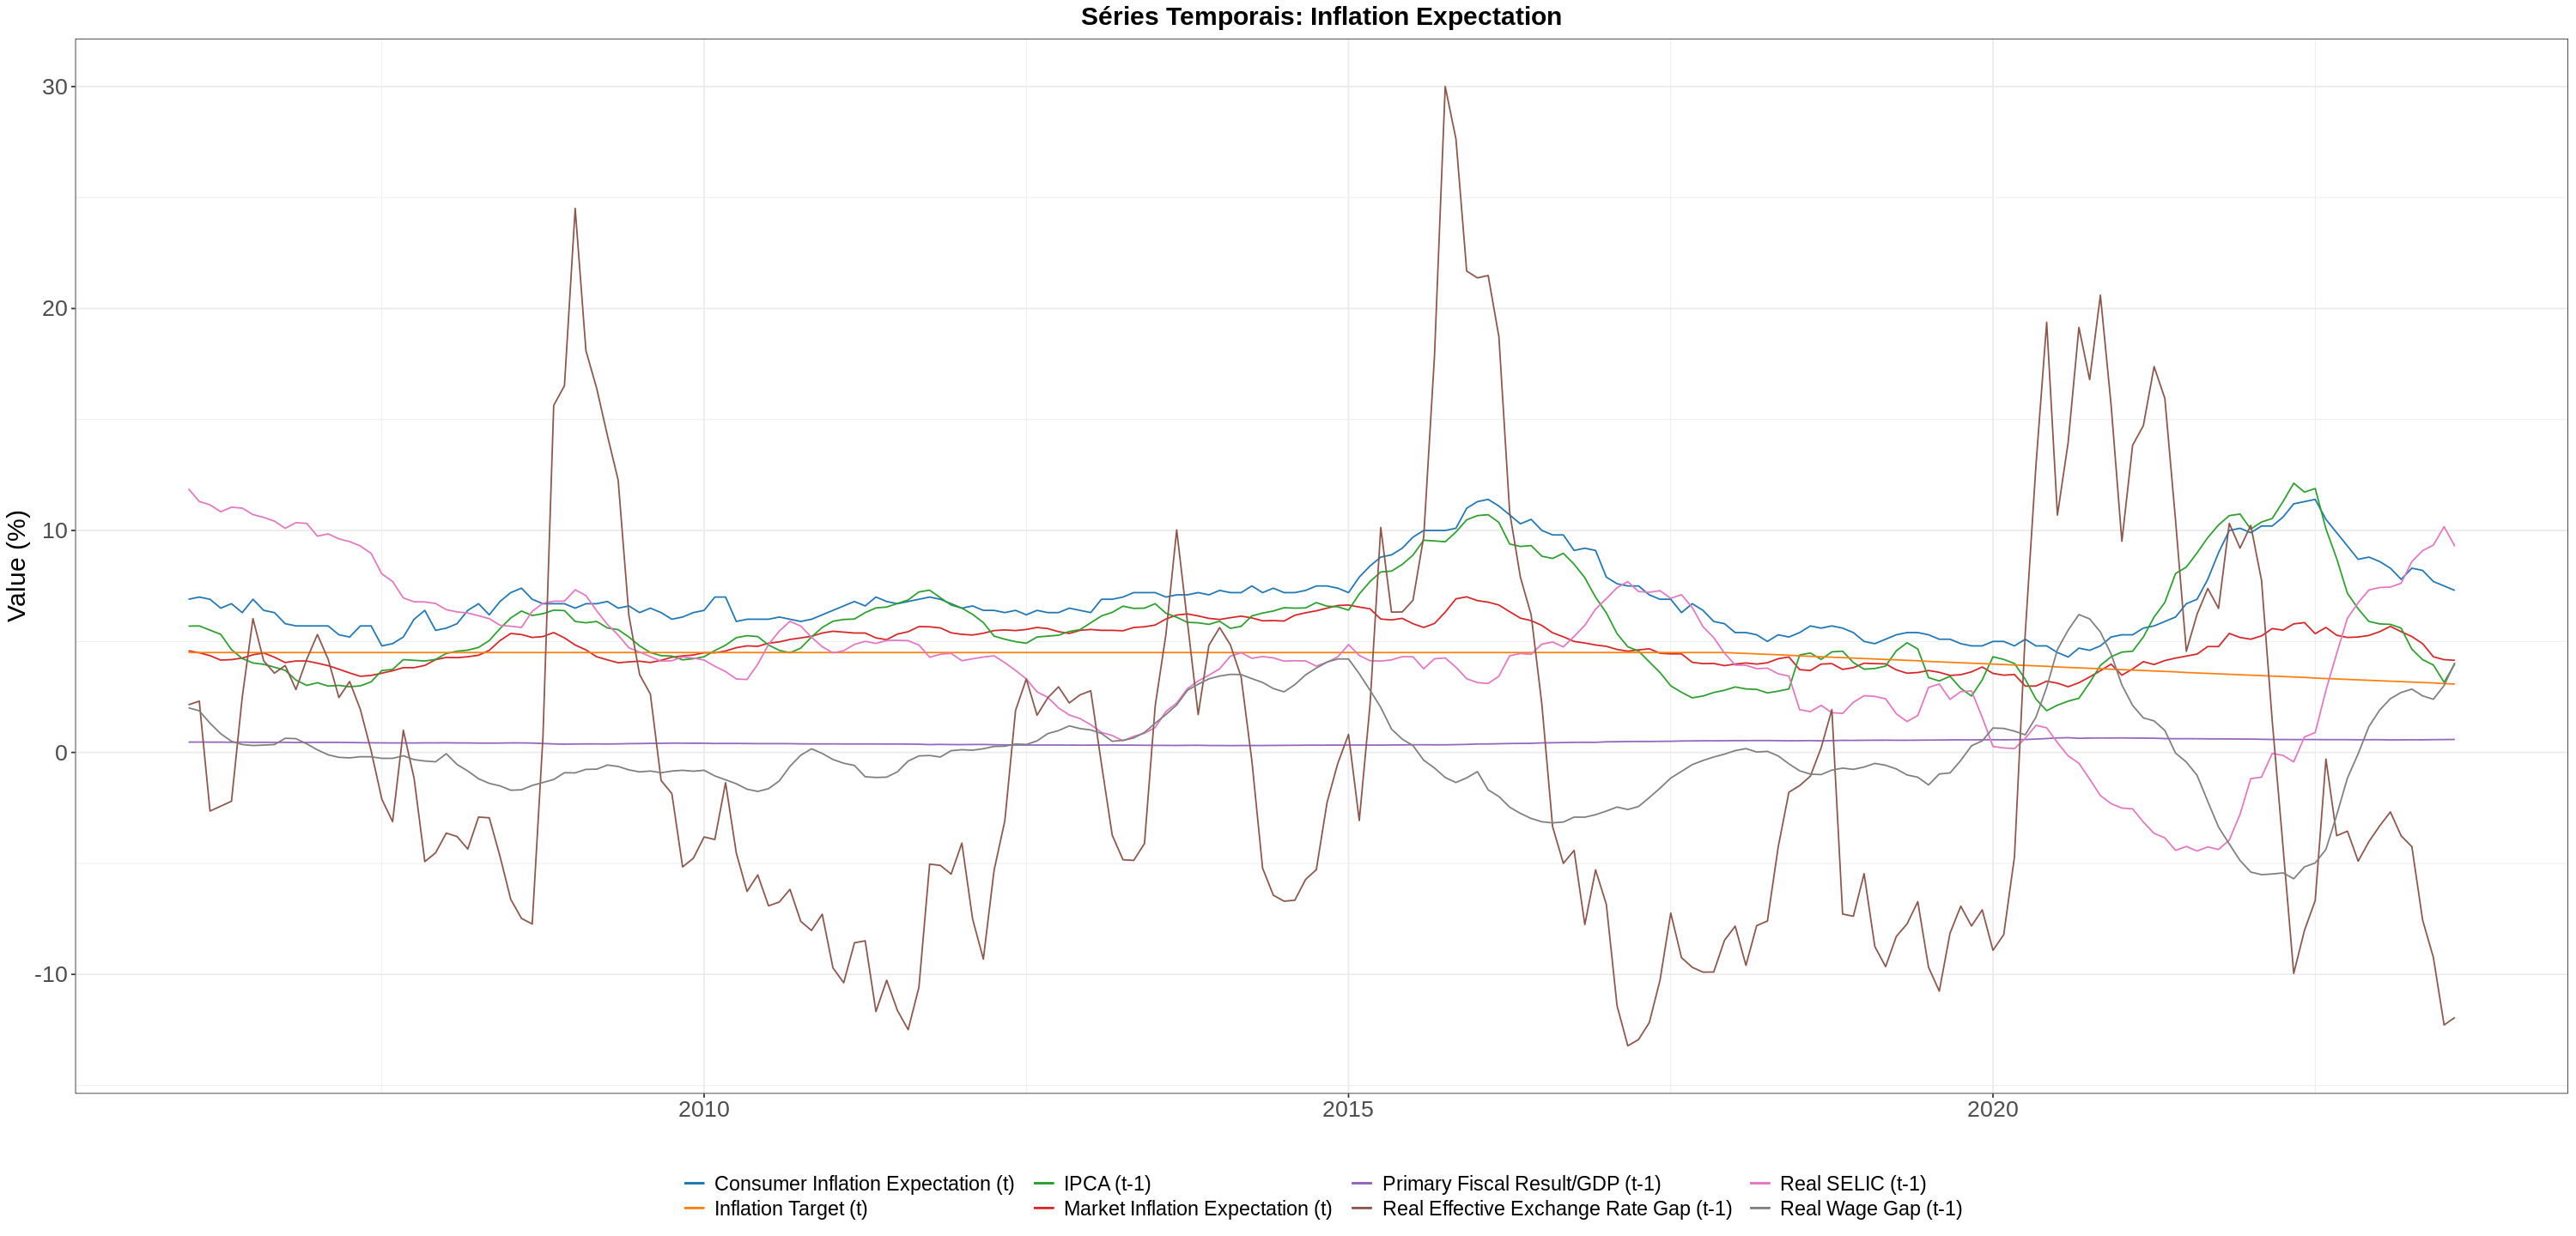

In [9]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 25, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_to_gdp_lag, color = "Primary Fiscal Result/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_gap_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = real_household_income_gap_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&= \alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Primary Fiscal Result/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1,6]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 5%

> **Modelo econométrico**

In [10]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag - 1,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag - 1,
    data = df_public_data)

In [11]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6035 -0.4084  0.0283  0.4208  1.6599 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.785748   0.022448  35.002   <2e-16 ***
inflation_target_wtd_avg          0.088856   0.052396   1.696   0.0914 .  
primary_fiscal_result_to_gdp_lag  2.994084   0.326460   9.171   <2e-16 ***
selic_deflated_lag                0.177617   0.014708  12.076   <2e-16 ***
real_exchange_rate_gap_lag       -0.001199   0.005375  -0.223   0.8237    
real_household_income_gap_lag     0.037032   0.023246   1.593   0.1127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6273 on 206 degrees of free

**Resultado**

- A variável `real_exchange_rate_gap_lag` e `real_household_income_gap_lag` não são estatisticamente significativas dado o nível de significância β escolhido, enquanto que as outras variáveis são estatisticamente significativas.

In [12]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag - 1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08504 -0.29684  0.04233  0.29221  0.96734 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.438619   0.014962  29.316  < 2e-16 ***
inflation_target_wtd_avg          0.635216   0.034921  18.190  < 2e-16 ***
primary_fiscal_result_to_gdp_lag -1.117815   0.217584  -5.137 6.45e-07 ***
selic_deflated_lag                0.032934   0.009803   3.360  0.00093 ***
real_exchange_rate_gap_lag       -0.020924   0.003583  -5.840 2.01e-08 ***
real_household_income_gap_lag     0.194728   0.015493  12.569  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4181 on 206 degrees

In [13]:
tidy( market_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.43861853,0.014961829,29.315835,1.924823e-75
inflation_target_wtd_avg,0.63521644,0.034921426,18.189877,9.999136e-45
primary_fiscal_result_to_gdp_lag,-1.11781466,0.217584100,-5.137391,6.445161e-07
selic_deflated_lag,0.03293442,0.009802869,3.359671,9.297509e-04
real_exchange_rate_gap_lag,-0.02092437,0.003582679,-5.840426,2.006278e-08
real_household_income_gap_lag,0.19472789,0.015493083,12.568699,2.892943e-27


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

> **Modelo econométrico apenas com variáveis estatisticamente significativas**

- Adição de variável Confiança do Consumidor em t-1

In [14]:
consumer_linear_model_adjusted = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + consumer_confidence_index_lag - 1,
    data = df_public_data)

In [15]:
summary( consumer_linear_model_adjusted )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + consumer_confidence_index_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57735 -0.40117  0.04908  0.48663  1.51006 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.760653   0.019140  39.741  < 2e-16 ***
inflation_target_wtd_avg          0.336427   0.089523   3.758 0.000223 ***
primary_fiscal_result_to_gdp_lag  3.140369   0.325801   9.639  < 2e-16 ***
selic_deflated_lag                0.176932   0.014127  12.524  < 2e-16 ***
consumer_confidence_index_lag    -0.010885   0.003709  -2.935 0.003715 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.617 on 207 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9925 
F-statistic:  5645 on 5 and 207 D

In [16]:
tidy( consumer_linear_model_adjusted )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.76065290,0.019140388,39.740725,7.850899e-99
inflation_target_wtd_avg,0.33642673,0.089522657,3.758006,2.227274e-04
primary_fiscal_result_to_gdp_lag,3.14036909,0.325800871,9.638922,2.127790e-18
selic_deflated_lag,0.17693184,0.014127476,12.523953,3.723823e-27
consumer_confidence_index_lag,-0.01088522,0.003709033,-2.934787,3.714586e-03


> ### **Distribuição dos Resíduos**

In [17]:
consumer_residuals <- residuals(consumer_linear_model_adjusted)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [18]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 212 0.01   0.61   -1.58 1.51
--------------------------------------


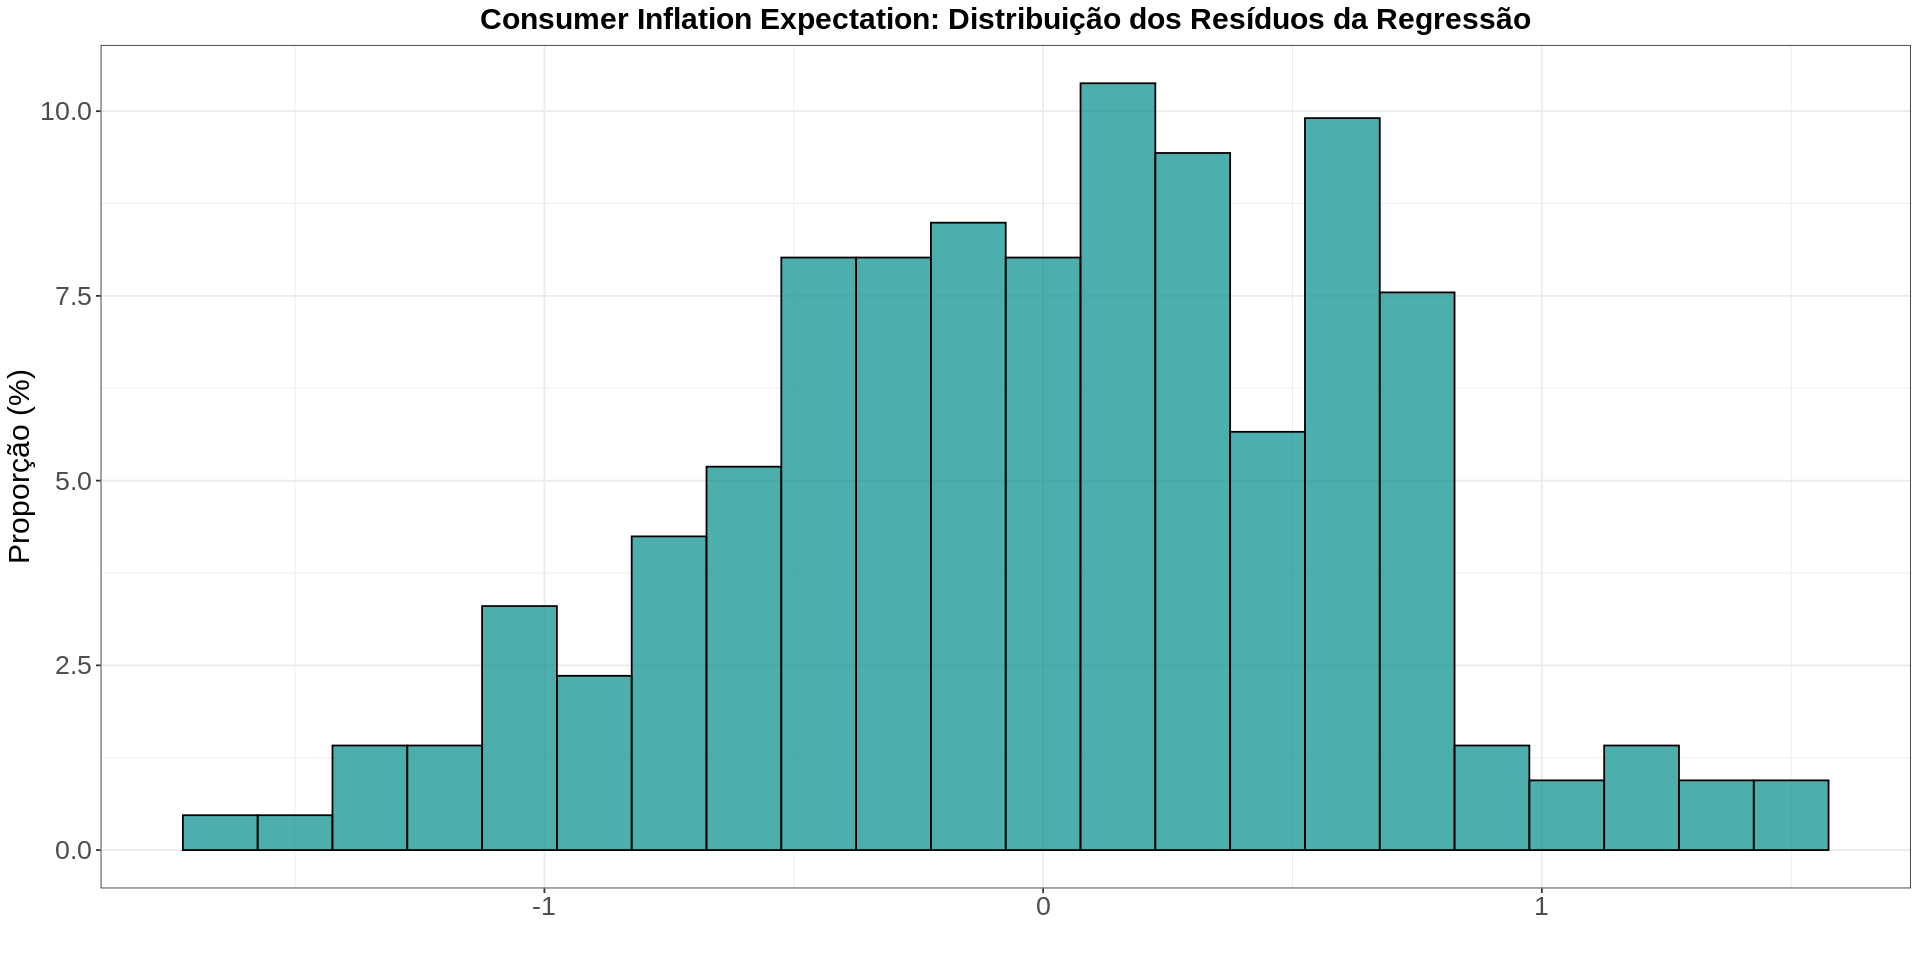

In [19]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [20]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 212 0.01   0.41   -1.09 0.97
--------------------------------------


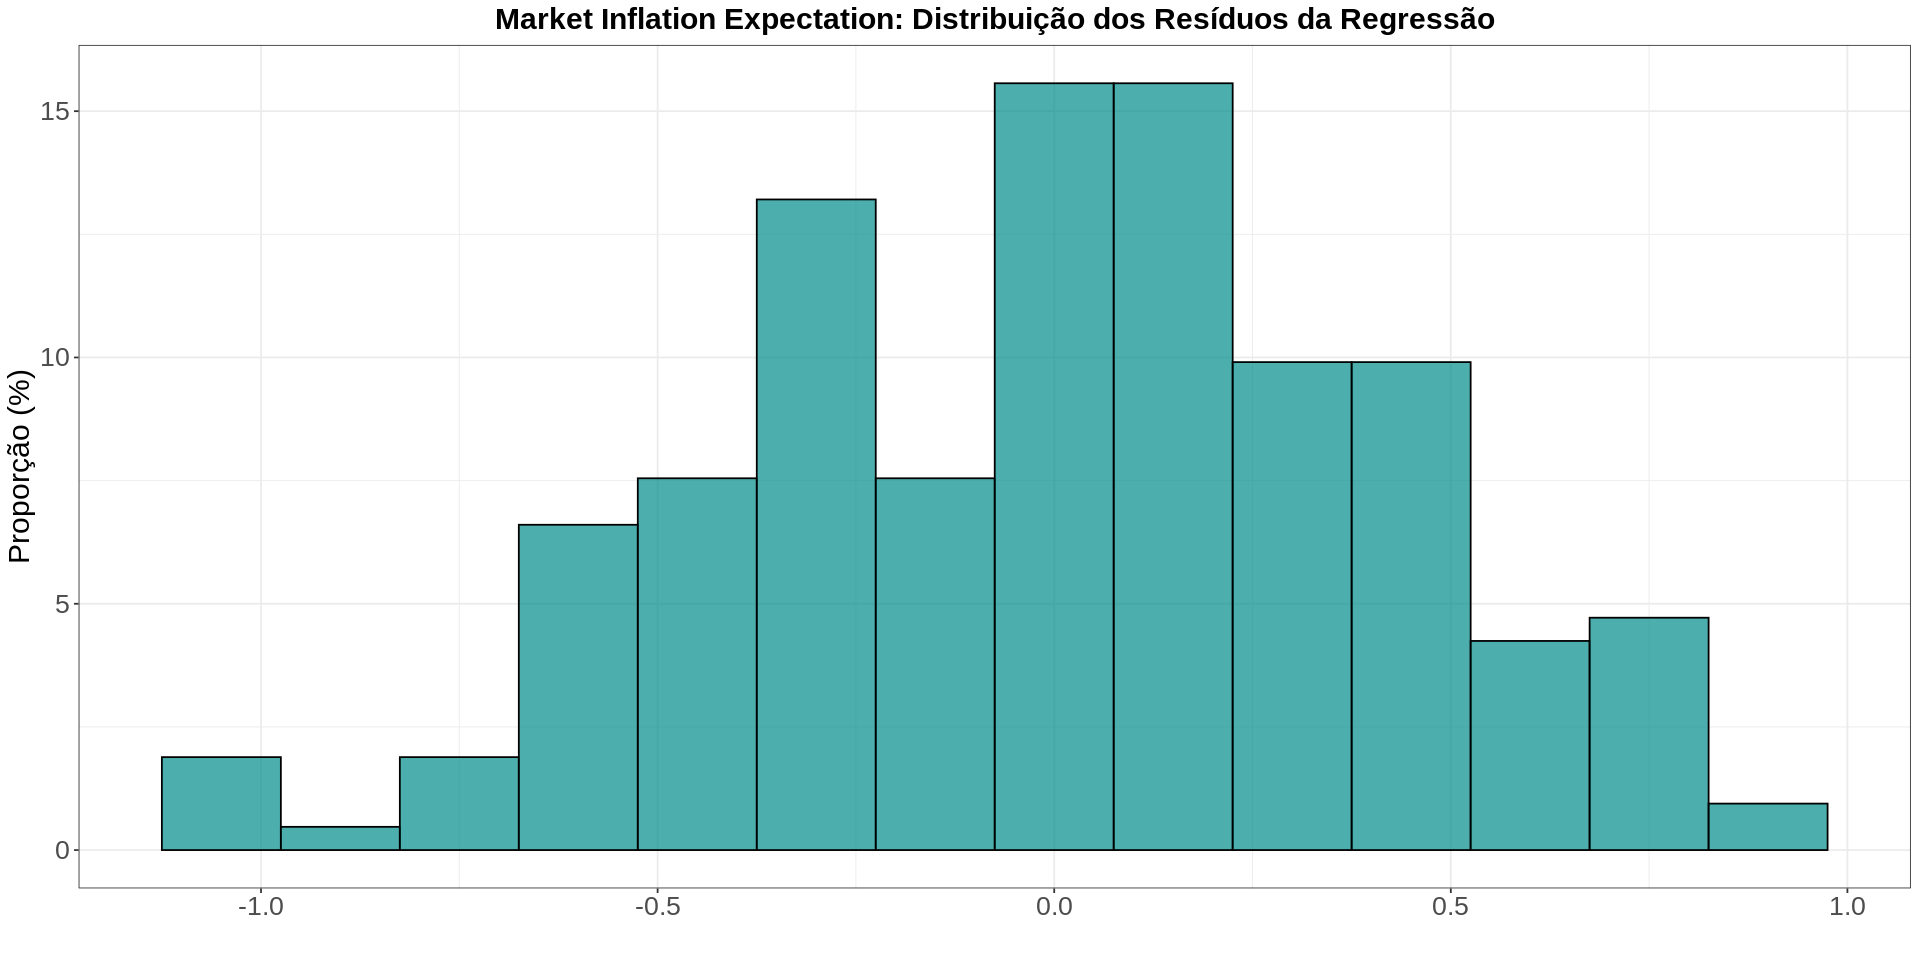

In [21]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Estacionariedade dos Resíduos**

> **ADF (Augmented Dickey-Fuller)**

- Nível de Significância
  * α = 5%

- Testes de Hipótese
  * **tau3**
    * Hipótese nula: possui raiz unitária
  * **phi2**
    * Hipótese nula: possui raiz unitária, sem tendência e sem drift
  * **phi3**
    * Hipótese nula: possui raiz unitária e sem tendência

In [22]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04076 -0.16726  0.00418  0.18863  1.02047 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0431411  0.0513658  -0.840  0.40207   
z.lag.1      -0.1797215  0.0600416  -2.993  0.00314 **
tt            0.0005032  0.0004132   1.218  0.22479   
z.diff.lag1   0.0055910  0.0829535   0.067  0.94634   
z.diff.lag2  -0.0103911  0.0822856  -0.126  0.89965   
z.diff.lag3   0.0639702  0.0819698   0.780  0.43615   
z.diff.lag4  -0.0072371  0.0810291  -0.089  0.92893   
z.diff.lag5   0.1128191  0.0804108   1.403  0.16229   
z.diff.lag6   0.0464916  0.0802735   0.579  0.56319   
z.diff.lag7   0.0396560  0.0781139   0.508  0.61229   
z.diff.lag8  -0.0423754  0.0780561  -0.543 

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [23]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95527 -0.11818  0.00749  0.11202  0.90336 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0144203  0.0369777  -0.390 0.697008    
z.lag.1      -0.2428504  0.0836861  -2.902 0.004162 ** 
tt            0.0002167  0.0002965   0.731 0.465712    
z.diff.lag1   0.1977487  0.0949957   2.082 0.038757 *  
z.diff.lag2  -0.0289178  0.0944290  -0.306 0.759769    
z.diff.lag3   0.0666197  0.0909553   0.732 0.464829    
z.diff.lag4  -0.0196788  0.0910486  -0.216 0.829122    
z.diff.lag5  -0.0345684  0.0867048  -0.399 0.690584    
z.diff.lag6  -0.0031338  0.0835619  -0.038 0.970124    
z.diff.lag7  -0.0938422  0.0805724  -1.165 0.245651    
z.diff.lag8  -0.1291421  0.07734

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- Nível de Significância
  * α = 5%

- Teste de Hipótese
  * $H_0$: não possui raiz unitária

In [24]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2586 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [25]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.166 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.